## Natural Language Processing - Assignment 01

In [1]:
# Importing necessary modules/ libraries 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file 
df = pd.read_csv('/Users/parthbansal/Downloads/Food_Inspections.csv')
data = df 
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2573172,3 SAUCES,3 SAUCES,2835644.0,Restaurant,Risk 1 (High),2002 S WENTWORTH AVE,CHICAGO,IL,60616.0,03/24/2023,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.855282,-87.631993,"(41.85528170377401, -87.63199264229414)"
1,2573171,K G HALL,K G HALL,1887545.0,Banquet Hall,Risk 1 (High),4235 W 47TH ST,CHICAGO,IL,60632.0,03/24/2023,Non-Inspection,No Entry,NaN,41.807682,-87.729847,"(41.807682027157476, -87.72984725145503)"
2,2573162,MARATHON,MARATHON,2900506.0,GAS STATION,Risk 3 (Low),5800-5810 W BELMONT AVE,CHICAGO,IL,60634.0,03/24/2023,License,Not Ready,NaN,41.938620,-87.771420,"(41.93861992874789, -87.77142033127757)"
3,2573131,ANTEPRIMA,ANTEPRIMA,1770521.0,Restaurant,Risk 1 (High),5316 N CLARK ST,CHICAGO,IL,60640.0,03/24/2023,Non-Inspection,No Entry,NaN,41.978616,-87.668470,"(41.97861615439425, -87.66847038837432)"
4,2573107,Cullen,Cullen,23891.0,School,Risk 1 (High),10650 S Eberhart (500E),CHICAGO,IL,60628.0,03/24/2023,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.700361,-87.611282,"(41.70036106831835, -87.611281758793)"


In [3]:
df.shape

(251507, 17)

#### 1. Select only the records corresponding to failed inspection (see "Results" column)

In [4]:
df['Results'].unique()

array(['Pass', 'No Entry', 'Not Ready', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [5]:
# Dropping results column since all results are 'Fail'
df = df[df['Results'] == 'Fail']
df = df.drop('Results', axis = 1)

#### 2. Clean the data, making sure that there are no NaNs in "Violations" column

In [6]:
df = df.dropna(subset = 'Violations')

#### 3, 4. "Violations" column lists the reasons for inspection failure. Those reasons are separated by "|".  Each reason consists of a regulation code, regulation description, and comments describing how the regulation was violated. Using regular expression, parse "Violations" column to select only regulation descriptions, no code or comments.

In [7]:
df['Violations'] = df['Violations'].str.split('|')

In [8]:
pattern = r'\d+\. (.+?) -'

In [9]:
df['Reason'] = df['Violations'].apply(lambda x: [re.findall(pattern, i) for i in x])

In [10]:
# The dataframe below has a column 'Reason' that displays only violation descriptions that occured on a given inspection date 
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Reason
8,2573064,LITTLE LEADERS OF TOMORROW,LITTLE LEADERS OF TOMORROW,2215828.0,Daycare (Under 2 Years),Risk 1 (High),5153 W LAKE ST,CHICAGO,IL,60644.0,03/23/2023,License,"[38. INSECTS, RODENTS, & ANIMALS NOT PRESENT -...",41.887068,-87.755006,"(41.887068052373245, -87.75500577147562)","[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [T..."
46,2572666,Sullivan (H/S),Sullivan (H/S),46301.0,School,Risk 1 (High),6631 N BOSWORTH AVE,CHICAGO,IL,60626.0,03/16/2023,Canvass,"[38. INSECTS, RODENTS, & ANIMALS NOT PRESENT -...",42.002687,-87.669155,"(42.00268693638941, -87.66915532539507)","[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [I..."
113,2571904,A CHILD'S WORLD EARLY LEARNING,A CHILD'S WORLD EARLY LEARNING,2215835.0,Daycare Above and Under 2 Years,Risk 1 (High),2145 E 83RD ST,CHICAGO,IL,60617.0,03/01/2023,License,"[1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNO...",41.744280,-87.571635,"(41.74427989606148, -87.5716351762223)","[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL..."
133,2571806,DAIRY QUEEN,DAIRY QUEEN,2723927.0,Restaurant,Risk 2 (Medium),2200 N LINCOLN AVE,CHICAGO,IL,60614.0,02/27/2023,Complaint,"[1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNO...",41.921897,-87.644013,"(41.921896999082946, -87.64401334594686)","[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL..."
135,2571798,SILVER SPOON RESTAURANT,SILVER SPOON RESTAURANT,1514664.0,Restaurant,Risk 1 (High),710 N RUSH ST,CHICAGO,IL,60611.0,02/27/2023,Complaint,"[1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNO...",41.895321,-87.625620,"(41.89532082029217, -87.62562009892783)","[[], [CITY OF CHICAGO FOOD SERVICE SANITATION ..."


#### 5. Count how many times each regulation description occurred in the table and visualize top-10 the most frequent regulation descriptions

In [11]:
# Since column 'Reason' has nested list values, we're are exploding it to extract the strings in the lists
reason = df['Reason'].explode('Reason').explode()

In [12]:
counts = reason.value_counts().sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'Top 10 Most Frequent Regulation Descriptions')

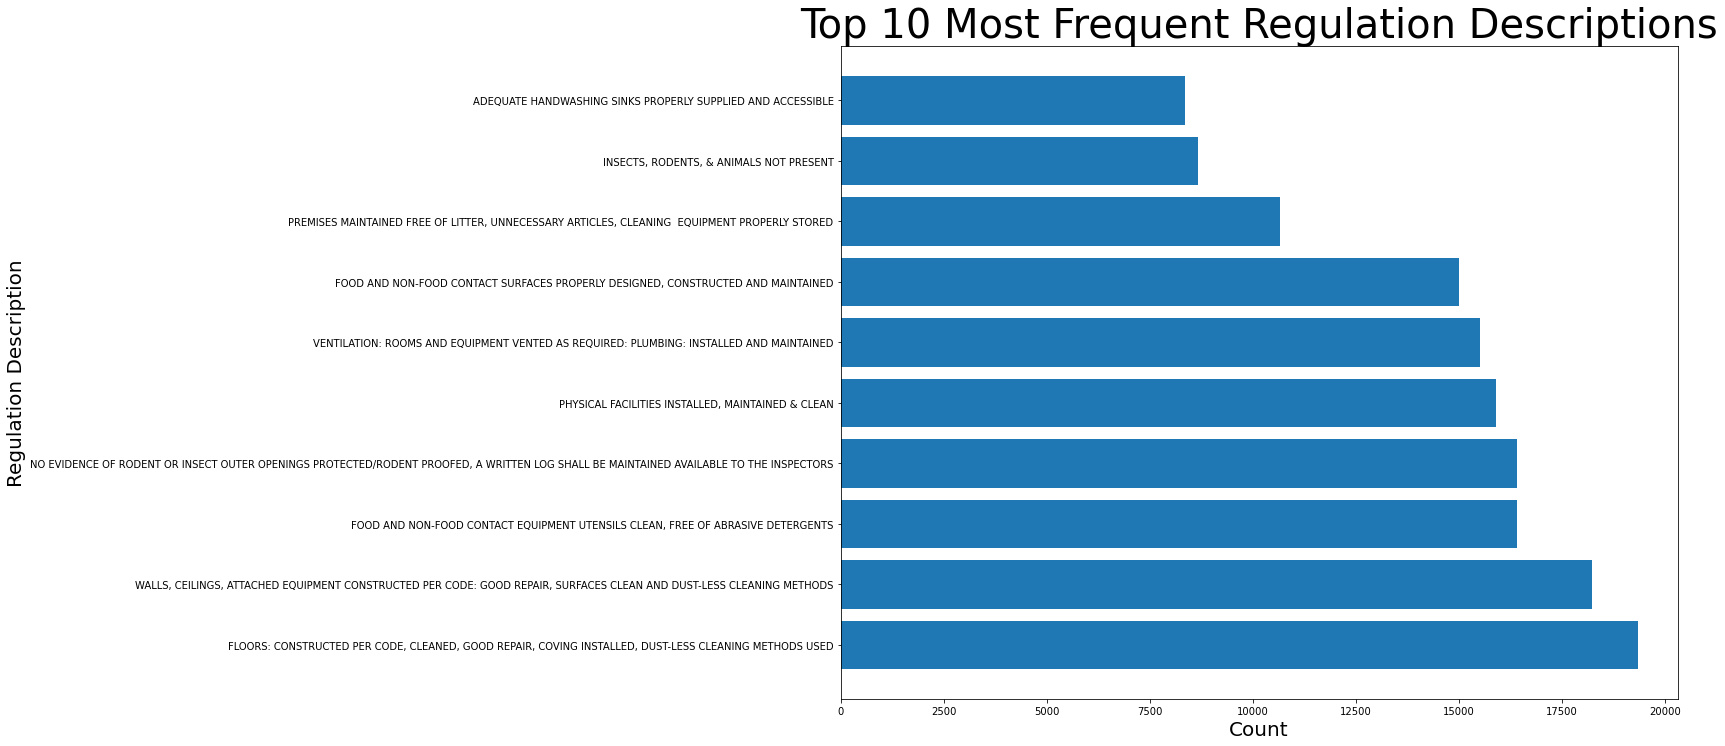

In [13]:
plt.figure(figsize=(15, 12))

plt.barh(counts.index, counts.values)
plt.ylabel('Regulation Description', size = 20)
plt.xlabel('Count', size = 20)
plt.title('Top 10 Most Frequent Regulation Descriptions', size = 40)

#### 6. Identify whether any of these restaurants are repeat offenders (explore a combination of License; Business Name and Address variables to determine what is the best way to uniquely identify a business) and whether the violations are the same or different for these repeat offenses

In [14]:
df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location',
       'Reason'],
      dtype='object')

In [15]:
# Creating new columns to explore a combination of variables to determine the best way to uniquely identify a business
df['id_1'] = df['License #'].astype(str) + '_' + df['DBA Name']
df['id_2'] = df['DBA Name'] + '_' + df['Address']
df['id_3'] = df['License #'].astype(str) + df['Address']
df['id_4'] = df['License #'].astype(str) + '_' + df['DBA Name'] + '_' + df['Address']

In [16]:
for col in ['Address', 'License #', 'DBA Name', 'id_1', 'id_2', 'id_3', 'id_4']:
    print(f"{col}: {df[col].nunique()}")

Address: 13810
License #: 20550
DBA Name: 17385
id_1: 21041
id_2: 19612
id_3: 20732
id_4: 21062


### On inspecting various combinations of the above varibales, we see that the combination of all three variables creates the highest number of unique ids. However, combining License # and DBA Name generates only 21 identifiers lesser. Plus, it's cleaner. 

### Hence, we'll use a combination of DBA Name and License # as our identifier.

In [17]:
# Dropping redundant columns 
df = df.drop(columns= ['DBA Name', 'AKA Name', 'License #', 'Address', 'City', 'State', 'Zip', 'Violations', 'Latitude', 'Longitude', 'Location', 'id_2', 'id_3', 'id_4'])

In [18]:
# Identify repeat offenders. Note, to be a repeated offender, the offense should occur on two different dates
# Displaying repeated offenders in descending order 
df_grouped = df.groupby('id_1').size().reset_index(name='count')
df_grouped = df_grouped[df_grouped['count'] > 1].sort_values(by='count', ascending=False)
df_grouped

,id_1,count
312,1095992.0_LAS ISLAS MARIAS,20
20431,60184.0_TAQUERIA EL RANCHITO,19
19786,39623.0_LUMES PANCAKE HOUSE,19
3901,1909713.0_IYANZE,19
1429,14616.0_ILLINOIS SPORTSERVICE INC,19
...,...,...
9254,22031.0_Louis J. Agassiz Elementary,2
9252,2203025.0_GRK GREEK KITCHEN,2
9250,2202944.0_Dunkin Donut,2
9245,2202881.0_Duran European Sandwiches Cafe,2


### There are 10,300 restaurants that have repeated offenses.

In [19]:
# Adding a Boolean column to main data frame to determine if the restaurnat is a repeat offender 
df['Repeated'] = df['id_1'].isin(df_grouped['id_1'])
df.head()

,Inspection ID,Facility Type,Risk,Inspection Date,Inspection Type,Reason,id_1,Repeated
8,2573064,Daycare (Under 2 Years),Risk 1 (High),03/23/2023,License,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [T...",2215828.0_LITTLE LEADERS OF TOMORROW,True
46,2572666,School,Risk 1 (High),03/16/2023,Canvass,"[[INSECTS, RODENTS, & ANIMALS NOT PRESENT], [I...",46301.0_Sullivan (H/S),True
113,2571904,Daycare Above and Under 2 Years,Risk 1 (High),03/01/2023,License,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",2215835.0_A CHILD'S WORLD EARLY LEARNING,True
133,2571806,Restaurant,Risk 2 (Medium),02/27/2023,Complaint,"[[PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWL...",2723927.0_DAIRY QUEEN,False
135,2571798,Restaurant,Risk 1 (High),02/27/2023,Complaint,"[[], [CITY OF CHICAGO FOOD SERVICE SANITATION ...",1514664.0_SILVER SPOON RESTAURANT,True


In [20]:
# The following data frame displays a list of repeated offenders with count of unique offenses
# If the count is one, the violations are the same else different
temp_df = df[df['Repeated'] == True]
temp_df = temp_df.explode('Reason').explode('Reason')
temp_df = temp_df.groupby(['id_1', 'Reason']).size().reset_index(name='count')
temp_df = temp_df.groupby('id_1').size().reset_index(name='count')
temp_df = temp_df.sort_values(by='count', ascending=False)
temp_df

,id_1,count
147,1095992.0_LAS ISLAS MARIAS,54
5479,2262538.0_ARAMARK-SOLDIER FIELD,53
47,1042888.0_DEVON MARKET,52
6197,2341764.0_DOLO GARDEN RESTAURANT & BAR,52
9920,60184.0_TAQUERIA EL RANCHITO,51
...,...,...
4830,2202766.0_E&C GROCERY STORE,1
7163,2457748.0_FIREFIN POKE SHOP,1
6464,2373667.0_HALSTED STREET DELI & BAGEL,1
5437,2256167.0_Q SAZON MEXICAN RESTAURANT,1


### The dataframe above contains a list of repeated offenders. If the count is equal to 1, they have the same violations. If it is more than 1, they have different violations.

#### 7. Review the restaurants "Out of Business", is there an extended history of prior violations for these closed businesses?

In [21]:
# Filtering the data to only hold info. about establishments that went out of business 
data = data[data['Results'] == 'Out of Business']
data = data.drop('Results', axis = 1)

In [22]:
# Adding a unique identifier 
data['id_1'] = data['License #'].astype(str) + '_' + data['DBA Name']

In [23]:
data['id_1'].nunique()

20976

In [24]:
# Disaplying 'Out of Business' restaurants with the most violations 
data_grouped = data.groupby('id_1').size().reset_index(name='count')
data_grouped = data_grouped[data_grouped['count'] > 1].sort_values(by='count', ascending=False)
data_grouped

,id_1,count
1830,1354323.0_SPORTSERVICE SOLDIER FIELD,57
8308,2013962.0_KENDALL COLLEGE,15
6821,1932251.0_MCCORMICK PLACE,12
8996,20481.0_THE GREAT STATE FARE,10
1826,1354323.0_SPORT SERVICE SOLDIER FIELD,5
...,...,...
6902,1937125.0_TOMATO HEAD,2
6778,1927637.0_EVERYDAY THAI,2
6686,1922019.0_THE FACTORY A GENTLEMEN'S CLUB,2
6640,1916361.0_JIMMY JOHN'S-JACKSON,2


### Of the 20,976 restaurants that went out of business, only 411 (1.96%) had prior violations. Therefore, having a history of previous violations does not seem to be a significant contributing factor to restaurant closures.

#### 8. Food inspection data has 10+ years of history, do you see any changing trends in most common violations?  Plot the results for top-5 most frequent violations over time

In [25]:
new_df = df.explode('Reason').explode('Reason')

In [26]:
new_df['Inspection Date'] = pd.to_datetime(new_df['Inspection Date'])
new_df['Year'] = new_df['Inspection Date'].dt.year

In [27]:
counts = new_df.groupby(['Year', 'Reason']).size().reset_index(name='count')
top5 = counts.groupby('Reason').sum().sort_values(by='count', ascending=False).head(5).index.tolist()
top5 = counts[counts['Reason'].isin(top5)]

In [28]:
# Finding out the top-5 violations in the data
# temp = new_df.groupby(['Reason']).size().reset_index(name='count').sort_values(by='count', ascending=False)[:5]

<module 'matplotlib.pyplot' from '/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

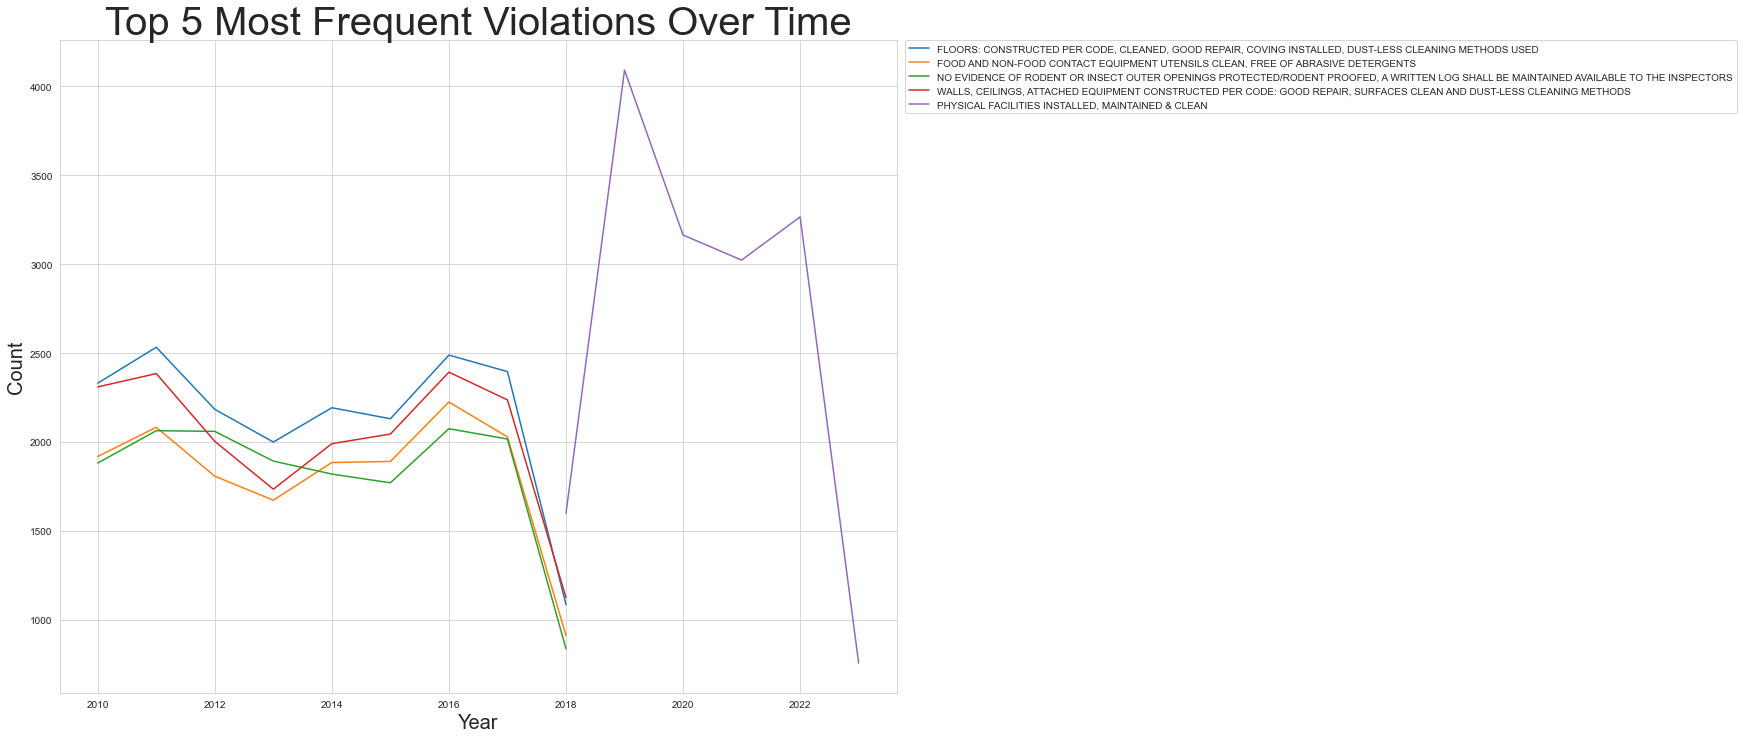

In [29]:
plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")
sns.lineplot(x='Year', y='count', hue='Reason', data=top5)

plt.xlabel('Year', size = 20)
plt.ylabel('Count', size = 20)
plt.title('Top 5 Most Frequent Violations Over Time', size = 40)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt

#### 9, 10. Your final output should be a Jupyter notebook showing all your code and the results so that one can easily reproduce them. Remember: you are presenting it to your boss and have very limited amount of time to state your case. Your presentation (charts and explanations within Jupyter notebook) should be as clear and short as possible but complete.